# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


# Drop columns

In [5]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


# Check for null values

In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

# Visualize the data

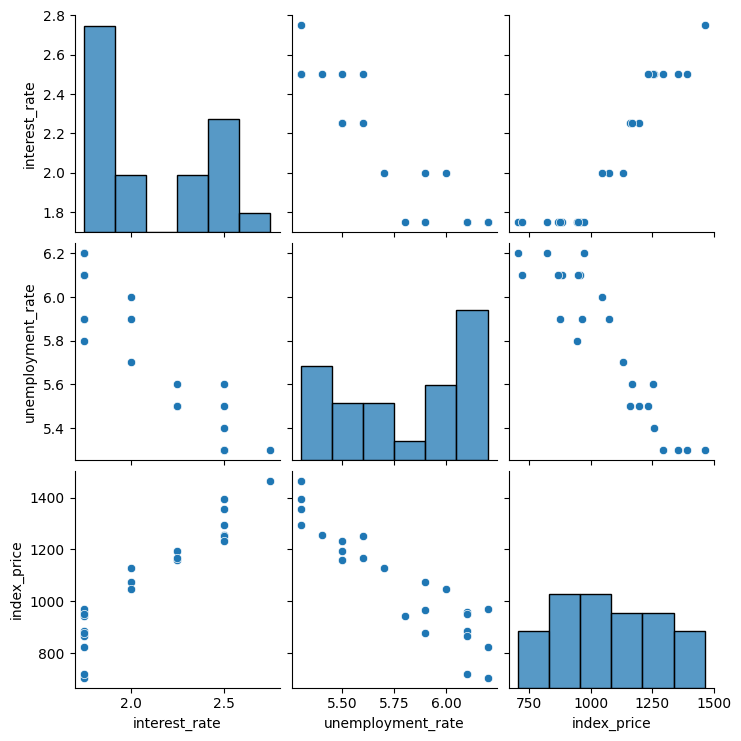

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

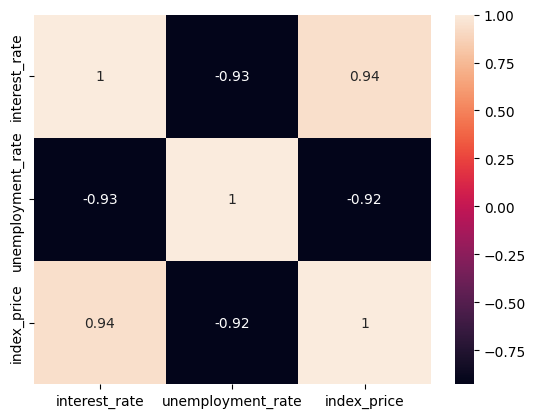

In [14]:
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'unemployment_rate')

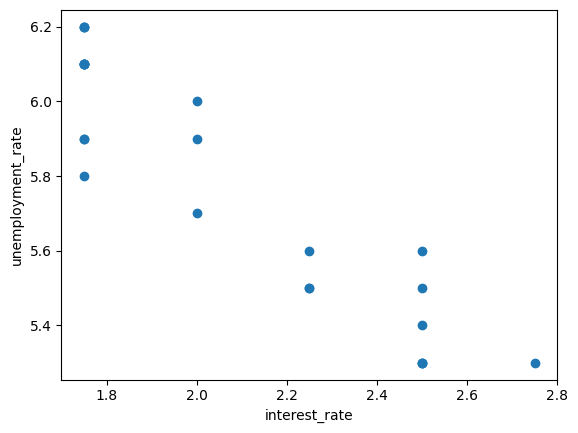

In [16]:
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

# Seperate dependent and independent features

In [17]:
X = df.drop('index_price', axis=1)
y = df['index_price']

In [18]:
X[:5]

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y[:5]

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

# Train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=1011)

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(18, 6, 18, 6)

<Axes: xlabel='interest_rate', ylabel='index_price'>

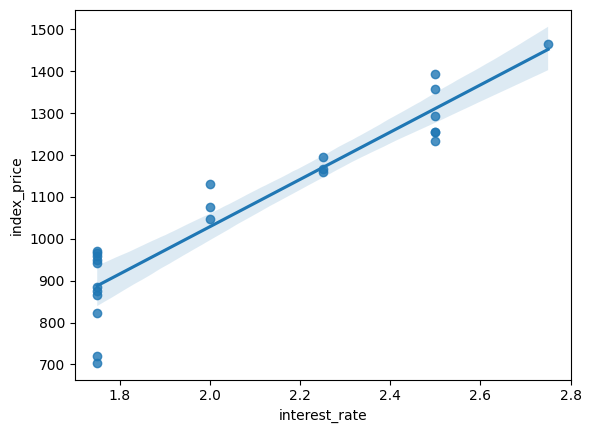

In [24]:
sns.regplot(x='interest_rate', y='index_price', data=df)

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
scaled_X_test[:5]

array([[ 1.52052622, -1.62076083],
       [-0.89442719,  1.03139326],
       [-0.89442719,  1.36291252],
       [ 2.3255107 , -1.62076083],
       [ 1.52052622, -0.95772231]])

In [29]:
scaled_X_train[:5]

array([[ 0.71554175, -0.95772231],
       [-0.08944272, -0.29468379],
       [-0.89442719,  1.36291252],
       [ 1.52052622, -1.62076083],
       [ 1.52052622, -0.62620305]])

# Model creation

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(scaled_X_train, y_train)

LinearRegression()

# Cross validation

In [33]:
from sklearn.model_selection import cross_val_score

In [39]:
validation_score = cross_val_score(estimator=regression, X=scaled_X_train, y=y_train, scoring='neg_mean_squared_error',cv=5)

In [40]:
validation_score

array([-6769.62565555, -3108.16323346, -5639.46930671, -8551.12666667,
       -5947.14102432])

In [41]:
np.mean(validation_score)

-6003.105177338033

# Predictions

In [42]:
y_pred = regression.predict(scaled_X_test)

In [43]:
y_pred

array([1351.47574287,  855.70861128,  818.5345664 , 1417.60066707,
       1277.12765312,  959.00758035])

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2_score = r2_score(y_test, y_pred)
Adjusted_R2 = 1-(1-R2_score)*(len(y_test)-1)/(len(y_test)-scaled_X_test.shape[1]-1)

In [46]:
errors = pd.DataFrame({"MAE":MAE, "MSE":MSE, "RMSE":RMSE, "R2":R2_score, "Adjusted_R2":Adjusted_R2}, index=['errors'])
errors

,MAE,MSE,RMSE,R2,Adjusted_R2
errors,66.458662,6421.098684,80.131758,0.845463,0.742438


# Assumptions

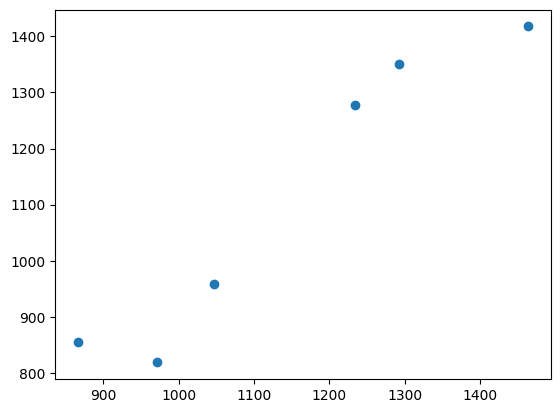

In [47]:
plt.scatter(y_test, y_pred)

### In here we can see the y_pred and y_test follow a linear relationship, which means our model has performed well

**************

In [49]:
residuals =  y_test-y_pred
residuals

3     -58.475743
19     10.291389
16    152.465434
0      46.399333
6     -43.127653
12     87.992420
Name: index_price, dtype: float64

# Plot the residuals using displot

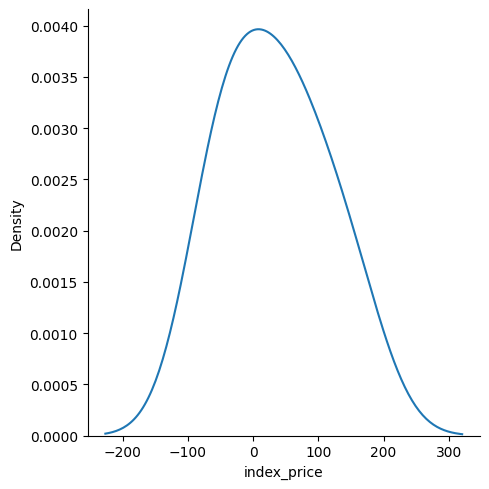

In [50]:
sns.displot(residuals, kind='kde')

### If we get a curve like this which look like a normal distribution then that also mean our model has performed well

***************

# Scatter plot with predictions and residual

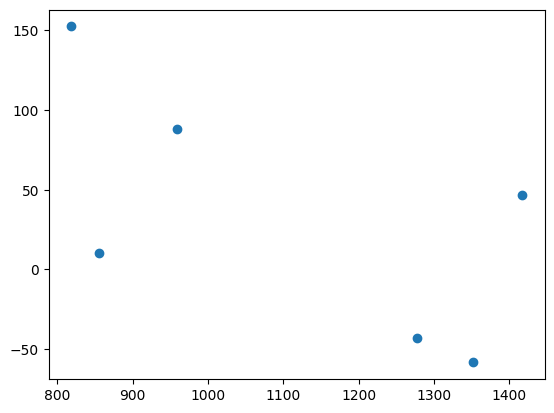

In [51]:
plt.scatter(y_pred, residuals)

### In here e can see this is uniformly distributed, which mean it does not have a pattern , the data does not follow any pattern. So by this also we can come to a conclution that the model is performing well